In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Evaluation on URL Dataset

In [76]:
# Import Files
data_path, files = "../src/test_runs/", ["naive", "learned", "sandwich", "adaptive", "disjoint"]

def read_file(path):
    file = open(path, 'r')
    lines = file.readlines()
    fpr_list = []
    for line in lines:
        fpr = None
        if line.startswith("False positive rate:"):
            fpr = float(line.split(": ")[1]) 
        if "FPR" in line:
            fpr = float(line.split(";")[1].strip()[6:])
        if fpr != None:
            if path.endswith("adaptive.txt") or path.endswith("disjoint.txt"):
                fpr = fpr * 100
            fpr_list.append(fpr)
    return fpr_list

fpr_map = {}
for file in files:
    fpr_map[file] = read_file(data_path + file + ".txt")

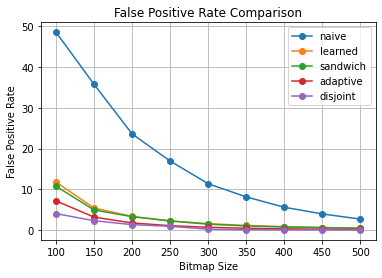

In [78]:
# Create FPR line graph
sizes = np.arange(100, 501, 50)

for key, value in fpr_map.items():
    plt.plot(sizes, value, label=key, marker='o')

plt.title("False Positive Rate Comparison")
plt.ylabel("False Positive Rate")
plt.xlabel("Bitmap Size")
plt.legend()
plt.grid(True)
plt.savefig("imgs/fpr.png")

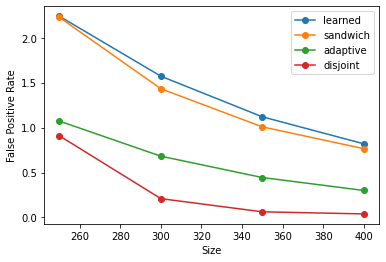

In [79]:
# FPR line graph of just high performing models, zoomed into 350-500
for key, value in fpr_map.items():
    if key != "naive":
        plt.plot(sizes[3:7], value[3:7], label=key, marker='o')

plt.ylabel('False Positive Rate')
plt.xlabel('Size')
plt.legend()
plt.savefig('imgs/fpr-zoom.png')